In [2]:
# Import of the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


from pca import pca

## Accuracy
from sklearn.metrics import mean_squared_error

## Building Model
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
# import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt

## Multidimensional Scaling
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
clinical_trajectories_df = pd.read_excel('clinical_trajectories_df.xlsx', sheet_name=0)
# df.head(10)

In [50]:
df = clinical_trajectories_df

In [51]:
drop_list = [
    "DonorID", "neuropathological_diagnosis", "Gender", "Year_donor_death", 
    "Year", "Age", "year_before_death", "chars_in_clin" 
]


df = df.drop(drop_list, axis=1)

# clinical_trajectories_df = clinical_trajectories_df.dropna()
# df.reset_index(drop=True, inplace=True)
df.head(10)

,age_at_death,Muscular_Weakness,Spasticity,Hyperreflexia_and_oth_reflexes,Fasciculations,Positive_sensory_symptoms,Negative_sensory_symptoms,Parkinsonism,Facial_masking,Tremor,...,Orthostatic_hypotension,Headache_migraine,Fatigue,Declined_deteriorated_health,Cachexia,Weight_loss,Reduces_oral_intake,Help_in_ADL,Day_care,Admission_to_nursing_home
0,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [52]:
df.isnull().sum().sum()

0

In [53]:
list_specific_symptoms = ["Communication_problems", "Concentration_problems", "Fatigue", "Headache_migraine", "Seizures", "Sleep_disturbances", "Stress", "Vivid_dreaming", "Weight_loss"]
list_autonomic_dysfunction = ["Constipation", "Orthostatic_hypotension", "Urinary_incontinence", "Urinary_problems_other"]
list_cerebellar_and_vestibular_system_dysfunction = ["Balance_problems", "Loss_of_coordination", "Nystagmus", "Vertigo"]
list_changes_in_consciousness_awareness_orientation = ["Confusion", "Day_night_rhythm_disturbances", "Delirium", "Delusions", "Disorientation", "Hallucinations", "Lack_of_insight", "Paranoia_suspiciousness", "Psychosis", "Wandering"]
list_cognitive_and_memory_impairment = ["Amnesia","Confabulations","Dementia","Forgetfulness","Impaired_recognition","Imprinting_disturbances","Memory_impairment"]
list_disinhibition = ["Apathy_inertia","Bradyphrenia","Disinhibition","Hyperorality","Loss_of_decorum"]
list_disturbances_in_mood_and_behaviour = ["Aggressive_behavior","Agitation","Anxiety","Changed_moods_emotions","Compulsive_behavior","Depressed_mood","Mania","Restlessness","Bradykinesia","Facial_masking","Parkinsonism","Rigidity","Tremor"]
list_general_decline = ["Admission_to_nursing_home","Cachexia","Day_care","Declined_deteriorated_health","Help_in_ADL","Reduces_oral_intake"]
list_mobility_problems = ["Frequent_falls","Mobility_problems"]
list_motor_deficits = ["Decreased_motor_skills","Dysarthria","Fasciculations","Hyperreflexia_and_oth_reflexes","Muscular_Weakness","Spasticity","Swallowing_problems_Dysphagia"]
list_other_psychiatric_symptoms = ["Psychiatric_admissions","Suicidal_ideation"]
list_other_symptoms_of_cortical_dysfunction = ["Aphasia","Apraxia","Executive_function_disorder","Facade_behavior","Language_impairment","Word_finding_problems"]
list_sensory_deficits = ["Hearing_problems","Negative_sensory_symptoms","Olfactory_gustatory_dysfunction","Positive_sensory_symptoms","Visual_problems"]


In [54]:
df['specific_symptoms'] = df[list_specific_symptoms].sum(axis=1)
df['autonomic_dysfunction'] = df[list_autonomic_dysfunction].sum(axis=1)
df['cerebellar_and_vestibular_system_dysfunction'] = df[list_cerebellar_and_vestibular_system_dysfunction].sum(axis=1)
df['changes_in_consciousness_awareness'] = df[list_changes_in_consciousness_awareness_orientation].sum(axis=1)
df['cognitive_and_memory_impairment'] = df[list_cognitive_and_memory_impairment].sum(axis=1)
df['disinhibition'] = df[list_disinhibition].sum(axis=1)
df['disturbances_in_behaviour'] = df[list_disturbances_in_mood_and_behaviour].sum(axis=1)
df['general_decline'] = df[list_general_decline].sum(axis=1)
df['mobility_problems'] = df[list_mobility_problems].sum(axis=1)
df['motor_deficits'] = df[list_motor_deficits].sum(axis=1)
df['other_psychiatric_symptoms'] = df[list_other_psychiatric_symptoms].sum(axis=1)
df['other_symptoms_of_cortical_dysfunction'] = df[list_other_symptoms_of_cortical_dysfunction].sum(axis=1)
df['sensory_deficits'] = df[list_sensory_deficits].sum(axis=1)

In [55]:
df.head()

,age_at_death,Muscular_Weakness,Spasticity,Hyperreflexia_and_oth_reflexes,Fasciculations,Positive_sensory_symptoms,Negative_sensory_symptoms,Parkinsonism,Facial_masking,Tremor,...,changes_in_consciousness_awareness,cognitive_and_memory_impairment,disinhibition,disturbances_in_behaviour,general_decline,mobility_problems,motor_deficits,other_psychiatric_symptoms,other_symptoms_of_cortical_dysfunction,sensory_deficits
0,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# df = df.drop(df.columns[[1:81]], axis=1)  # df.columns is zero-based pd.Index 
df.drop(df.iloc[:, 1:81], inplace=True, axis=1)

In [65]:
df.shape

(30399, 14)

In [58]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [59]:
X.var(axis=0).min(), X.var(axis=0).max()

(0.03465209509367248, 1.2848175021495856)

In [60]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [62]:
# X

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


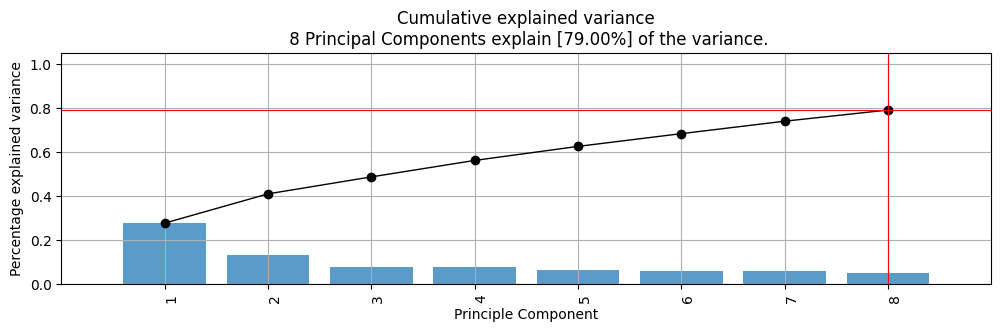

(<Figure size 1200x300 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 8 Principal Components explain [79.00%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 640x480 with 0 Axes>

In [67]:
model = pca(n_components=8, normalize=True, detect_outliers=['ht2', 'spe'])
results = model.fit_transform(X)

model.plot(figsize=(12, 3))

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [80] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [80] unique colors! Available unique colors: [9].


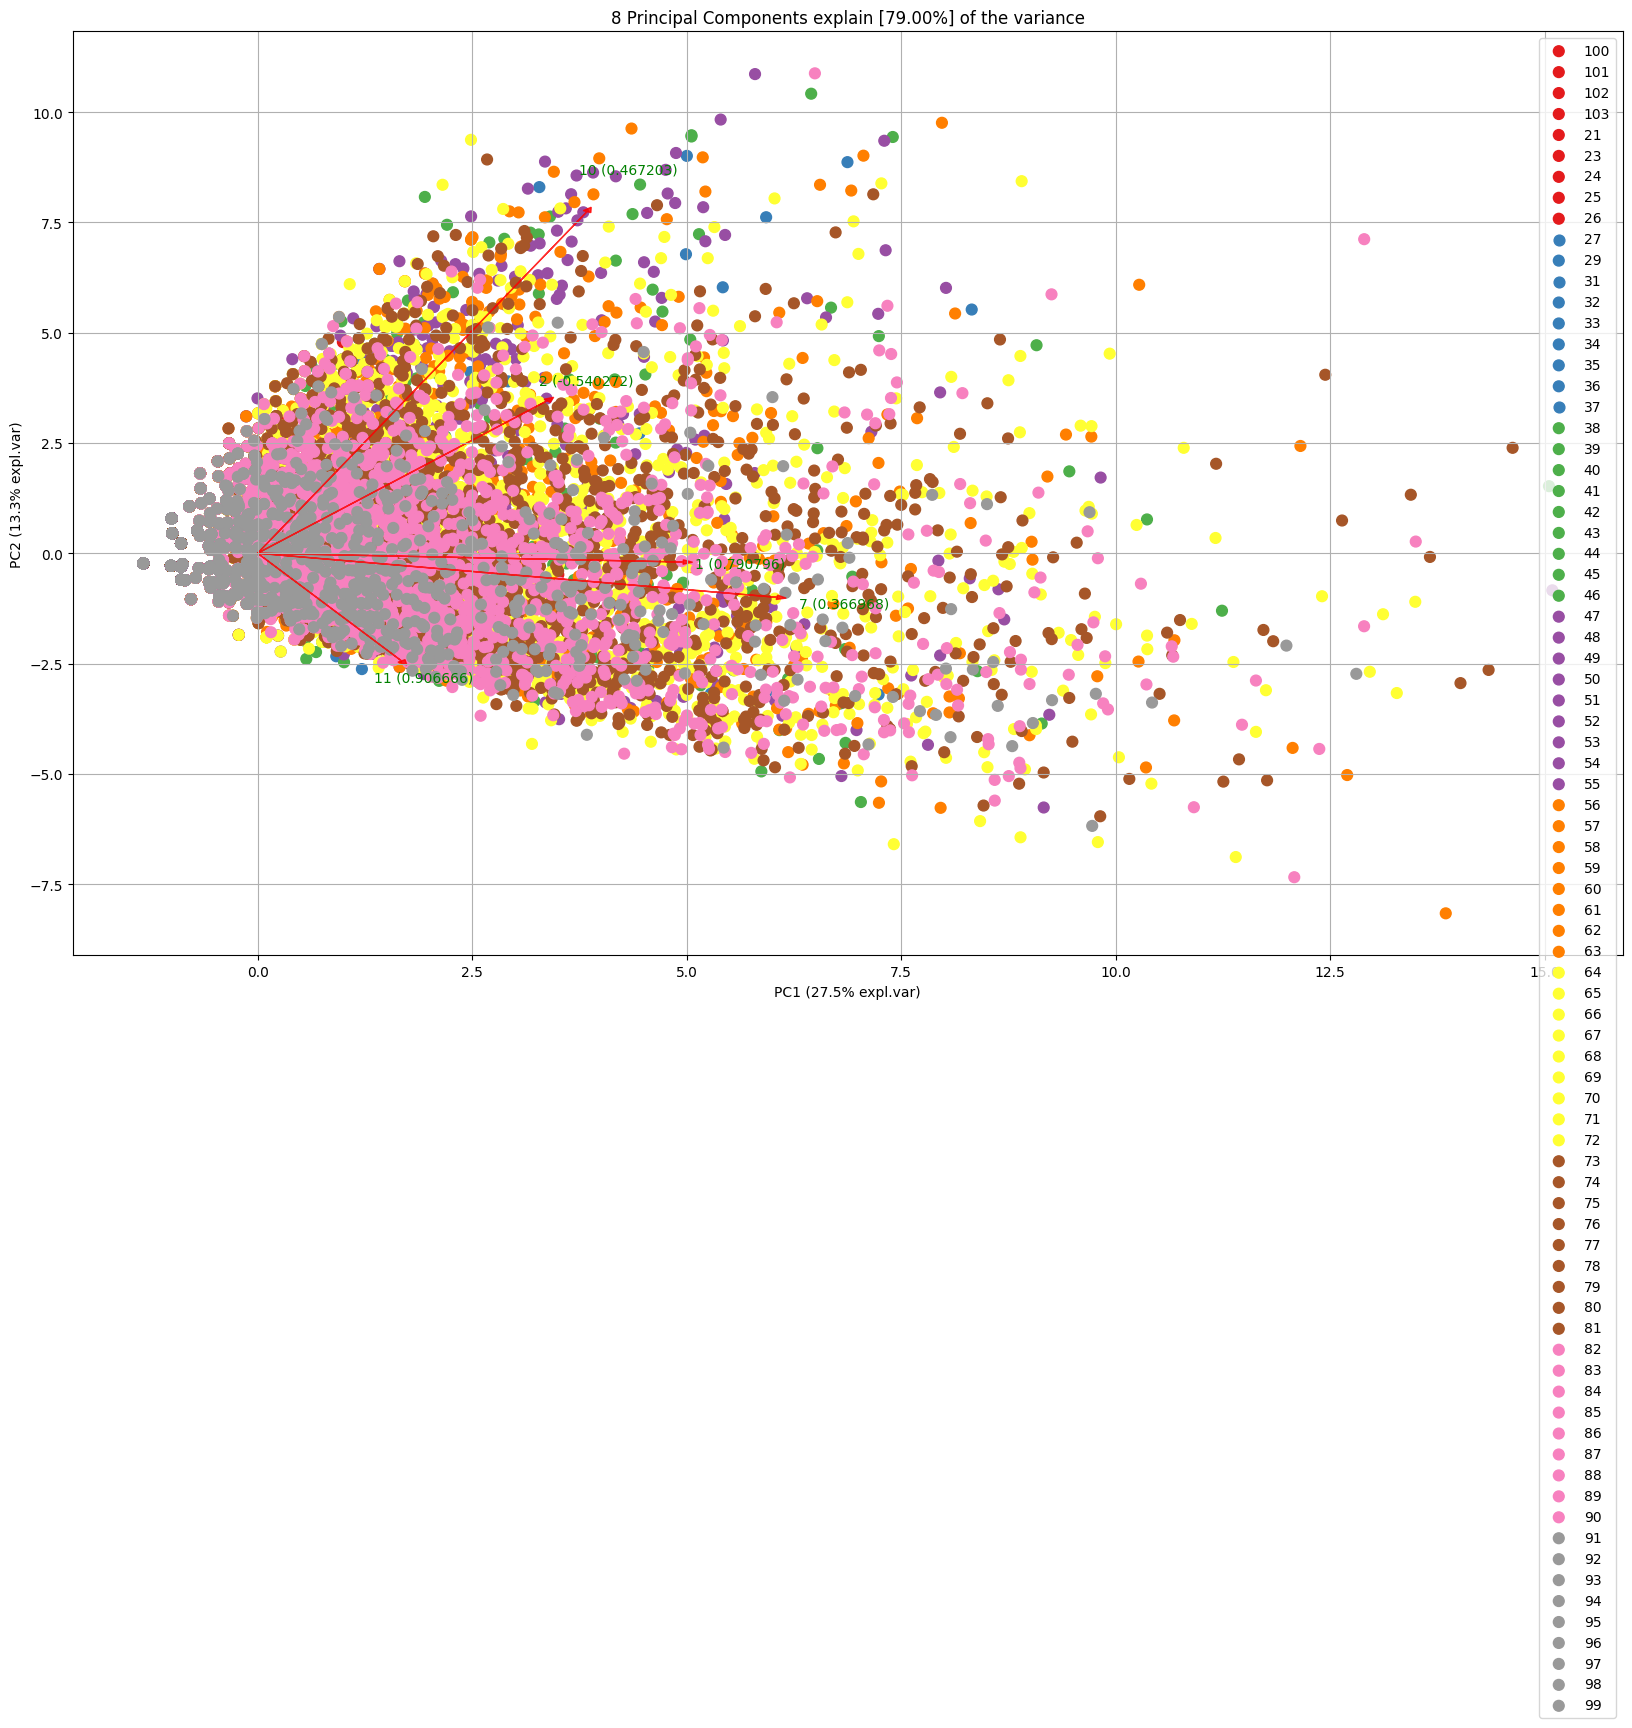

(<Figure size 2000x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [79.00%] of the variance'}, xlabel='PC1 (27.5% expl.var)', ylabel='PC2 (13.3% expl.var)'>)

In [68]:
model.biplot(n_feat=5, legend=True, figsize=(20, 12), y=y, label=False)

In [34]:
# loadings = results["loadings"]
# loadings

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


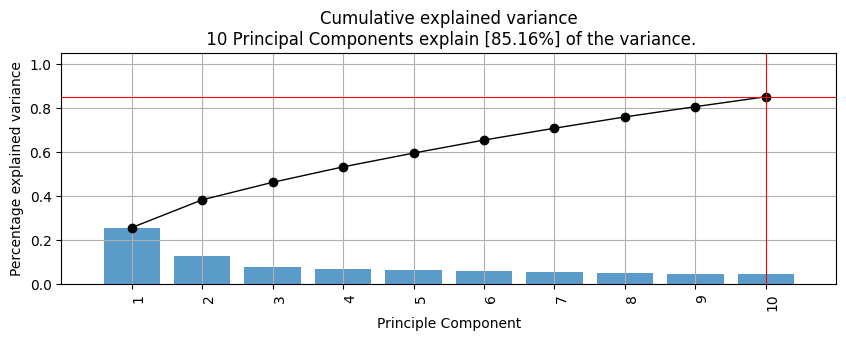

(<Figure size 1000x300 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 10 Principal Components explain [85.16%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 640x480 with 0 Axes>

In [70]:
model = pca(n_components=10, normalize=True)
results = model.fit_transform(df)
model.plot(figsize=(10, 3))

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [80] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [80] unique colors! Available unique colors: [9].


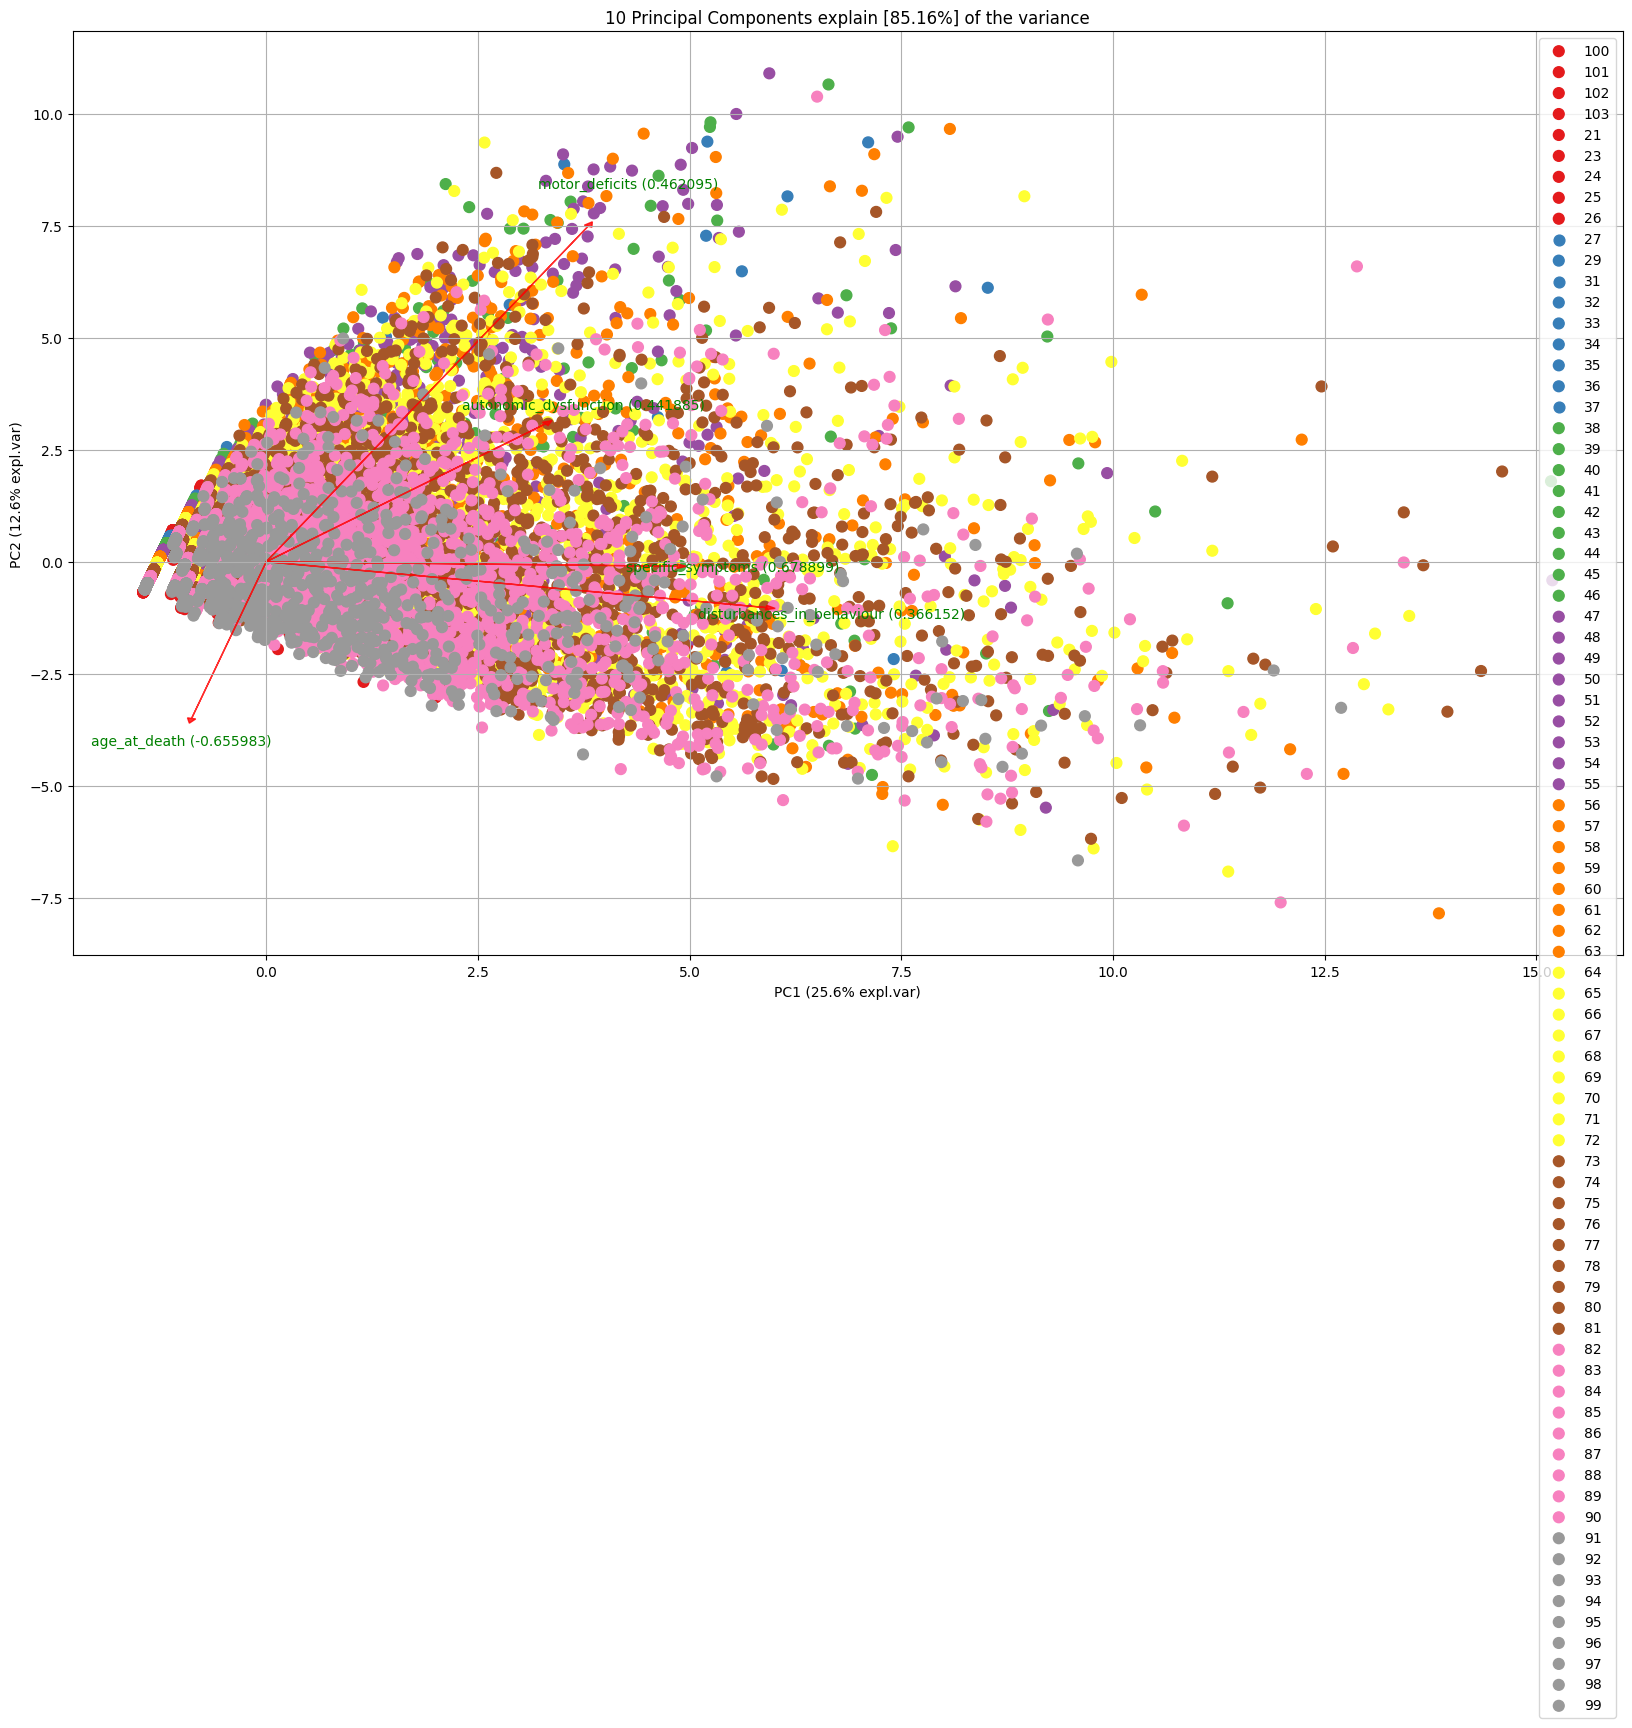

(<Figure size 2000x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'10 Principal Components explain [85.16%] of the variance'}, xlabel='PC1 (25.6% expl.var)', ylabel='PC2 (12.6% expl.var)'>)

In [71]:
model.biplot(n_feat=5, legend=True, figsize=(20,12), y=y, label=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [80] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [80] unique colors! Available unique colors: [9].


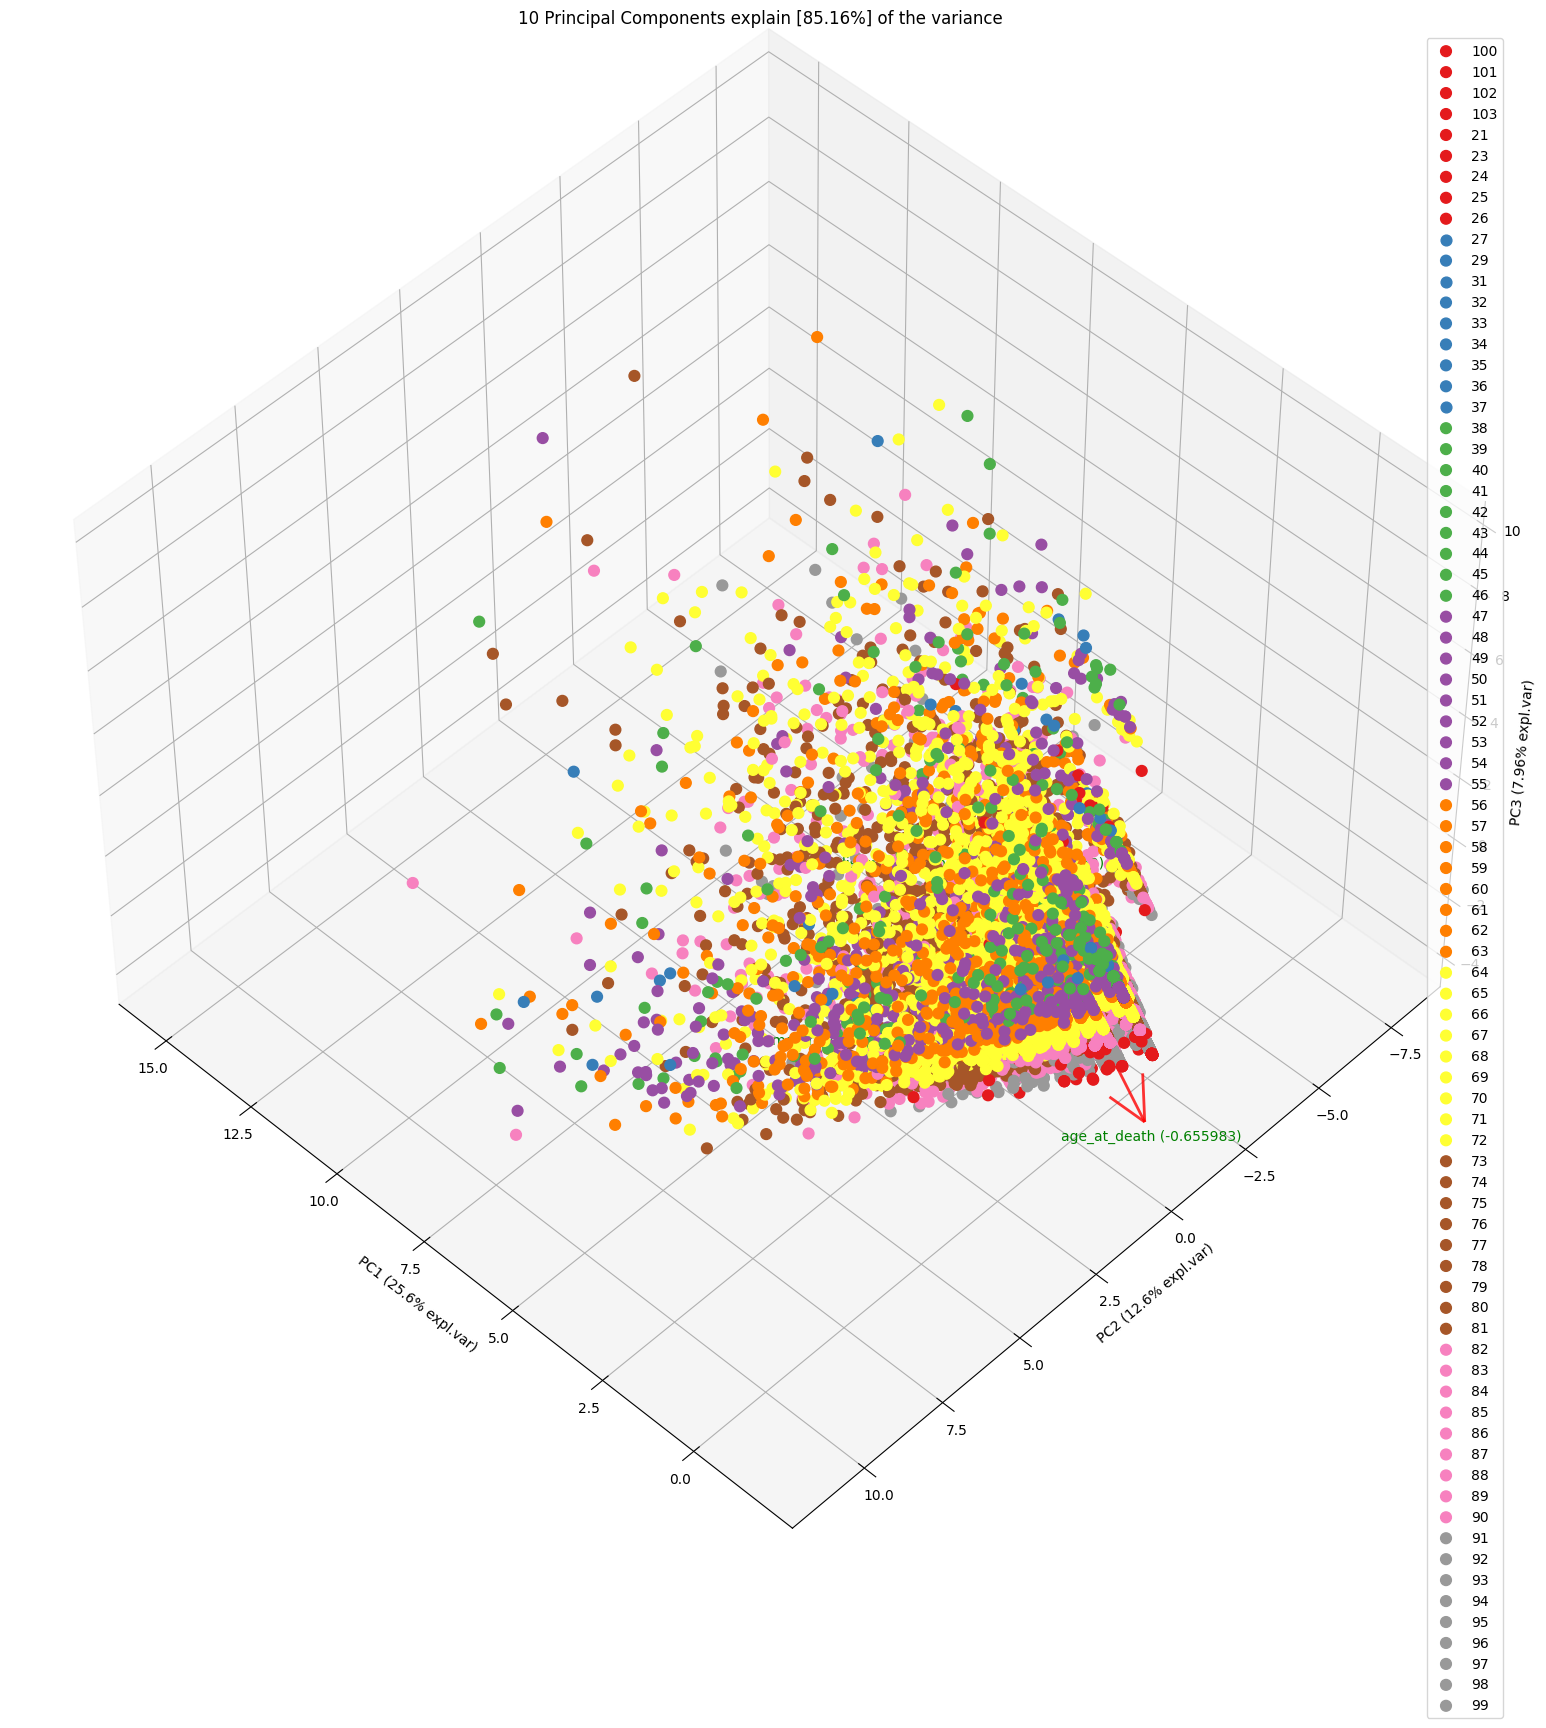

(<Figure size 2000x1500 with 2 Axes>,
 <Axes3D:title={'center':'10 Principal Components explain [85.16%] of the variance'}, xlabel='PC1 (25.6% expl.var)', ylabel='PC2 (12.6% expl.var)'>)

In [72]:
model.biplot3d(n_feat=3, legend=True, figsize=(20,15), y=y, label=False)

In [73]:
results['topfeat']

,PC,feature,loading,type
0,PC1,disturbances_in_behaviour,0.366152,best
1,PC2,motor_deficits,0.462095,best
2,PC3,age_at_death,-0.655983,best
3,PC4,autonomic_dysfunction,0.441885,best
4,PC5,age_at_death,0.599523,best
5,PC6,autonomic_dysfunction,0.603538,best
6,PC7,specific_symptoms,0.678899,best
7,PC8,general_decline,-0.557492,best
8,PC9,disinhibition,0.655968,best
9,PC10,mobility_problems,0.461435,best


In [74]:
results['outliers']

,y_proba,y_score,y_bool,y_bool_spe,y_score_spe
0,0.135200,27.002272,False,False,1.308137
1,0.135200,27.002272,False,False,1.308137
2,0.135200,27.002272,False,False,1.308137
3,0.135200,27.002272,False,False,1.308137
4,0.156492,26.288538,False,False,0.946819
...,...,...,...,...,...
30394,0.438723,20.309536,False,False,0.302079
30395,0.875606,13.041267,False,False,1.133080
30396,0.815277,14.294100,False,False,1.199262
30397,0.395261,21.031835,False,False,0.665941


## FA

In [75]:
# https://www.datacamp.com/tutorial/introduction-factor-analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(76942.5148466401, 0.0)

In [76]:
# https://www.earthinversion.com/geophysics/exploratory-factor-analysiabss/
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8392736002599155

In [95]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 4, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [96]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
len(ev)

14

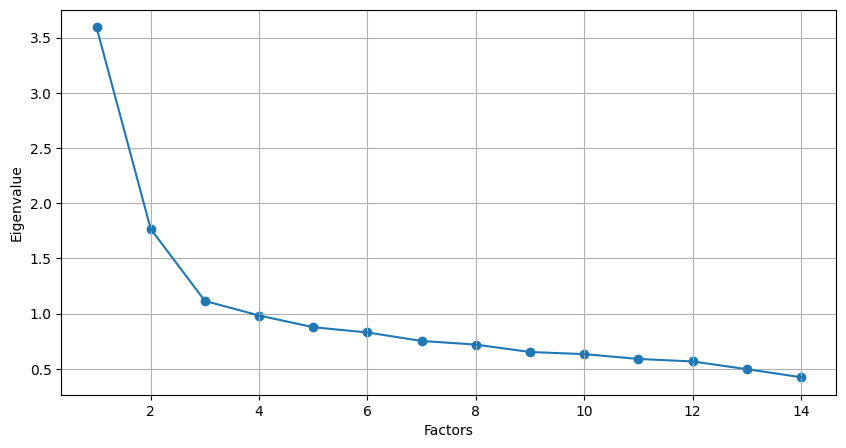

In [97]:
# Create scree plot using matplotlib


plt.figure(figsize=(10, 5))

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)

# plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

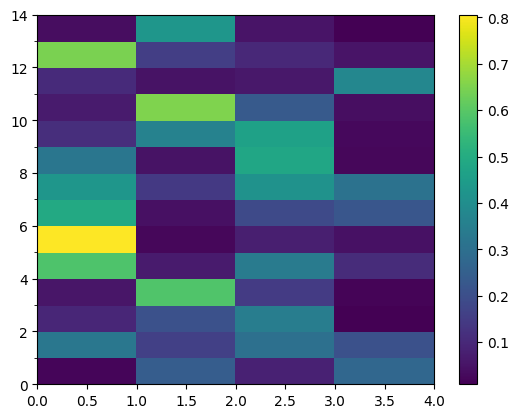

In [98]:
import numpy as np
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)

# plt.figure(figsize=(12, 10))

fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0]), minor=True)
ax.set_xticks(np.arange(fa.loadings_.shape[1]), minor=True)
# ax.set_yticklabels(fa.loadings.index.values)
# ax.set_xticklabels(fa.loadings.columns.values)

# plt.figure(figsize=(12, 5))
plt.show()

In [99]:
# pd.DataFrame.from_records(fa.loadings_)
pd.DataFrame(fa.loadings_,index=df.columns)

,0,1,2,3
age_at_death,0.019528,-0.240472,0.081347,-0.272857
specific_symptoms,0.325092,0.159945,0.298617,0.206760
autonomic_dysfunction,0.095150,0.206090,0.342731,0.009094
cerebellar_and_vestibular_system_dysfunction,0.052802,0.587068,0.148915,0.016574
changes_in_consciousness_awareness,0.581836,-0.065376,0.337315,0.107759
cognitive_and_memory_impairment,0.805664,0.023310,0.077399,-0.044411
disinhibition,0.488424,0.040946,0.188454,0.221601
disturbances_in_behaviour,0.426141,0.139955,0.413896,0.308135
general_decline,0.322618,0.047885,0.480666,0.024008
mobility_problems,0.113097,0.360550,0.464129,-0.026331


In [100]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.07720838, 1.26152736, 1.07711534, 0.42376166]),
 array([0.14837203, 0.0901091 , 0.07693681, 0.03026869]),
 array([0.14837203, 0.23848112, 0.31541793, 0.34568662]))